# Gradient descent demonstration

In this notebook I am going to demonstrate how the gradient descent optimization algorithm works.

I will use a linear regression as an example model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

First, let's generate some data for our model with a linear function.

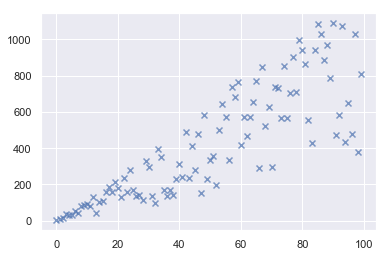

In [2]:
sns.set()
N = 100

def f(x):
    return 3*x + 2 + 10 * x * np.random.random()


# generating the dataset
X = np.array([x for x in range(N)])
y = np.array([f(x) for x in X])

plt.scatter(X, y, cmap='Dark2', marker='x', alpha=.7)
plt.show()

After generating the model, we can start to think about gradient descent.

The goal of linear regression is to find a ```slope``` and an ```intercept``` which satisfies the equation:

\begin{align}
\textbf{Y} = a\textbf{X} + b
\end{align}

Where ```a``` is the slope, ```b``` is the intercept as real numbers, ```Y``` is the target, and ```X``` is the input vector or matrix.  

Since satisfying this equation is impossible because of the irreducible error, the linear regression tries to find ```a``` and ```b``` such that the ```MSE = mean squared error```, or in this case the loss function is minimized.

\begin{align}
\textbf{MSE} = \frac{1}{N}\sum_{i=1}^N{(y_i - \hat{y})^2}
\end{align}

We can substitute in the linear equation for the `y_hat` prediction:

\begin{align}
\textbf{MSE} = \frac{1}{N}\sum_{i=1}^N{(y_i - (a\textbf{X} + b))^2}
\end{align}

Since we want to minimize the function we should find it's global minimum, therefore I am going to differentiate the `MSE` function in order to know the slope of the function in a given `X` point.

There are two variables in MSE so I will get it's gradient, or the function's all partial derivative.

\begin{align}
\frac{\partial E}{\partial X} = \frac{\partial MSE}{\partial X} = -2a(y_i - a\textbf{X} - b)
\end{align}

\begin{align}
\frac{\partial E}{\partial y} = \frac{\partial MSE}{\partial y} = 2(y_i - a\textbf{X} - b)
\end{align}

So, we will do these equations for every data point and then get the mean of the derived functions, this is the value we will use to update the `a` and `b` values.

Since the derivative shows the slope of the function in a point we should get it's inverse in order to go towards the linear `f` function's minima.

The gradient give really big numbers, so we will need a number called alpha to regularize it.

\begin{align}
\Delta{a} = -\alpha\frac{\partial E}{\partial X}\frac{1}{N}
\end{align}

\begin{align}
\Delta{b} = -\alpha\frac{\partial E}{\partial y}\frac{1}{N}
\end{align}

Where

\begin{align}
\newcommand\Inn{%
  \mathrel{\ooalign{$\subset$\cr\hfil\scalebox{0.8}[1]{$=$}\hfil\cr}}%
}
\alpha \in [-1;1]
\end{align}

We do this for a given number of iterations called `epoch` and then try to visualize the results.

In [5]:
epochs = 1000  # number of iterations
alpha = 0.0005  # a number to regularize the gradient

a, b = 2*np.random.random()-1, 2*np.random.random()-1
N = len(X)

for epoch in range(epochs):
    dE_dX = 0
    dE_dy = 0

    for i in range(N):
        dE_dX += -2*a*(y[i] - a*X[i] - b)
        dE_dy += 2*(y[i] - a*X[i] - b)

    a += -alpha*dE_dX / N
    b += -alpha*dE_dy / N

print('a = ' + str(a))
print('b = ' + str(b))

a = 8.708114029129074
b = -6.199104122237881


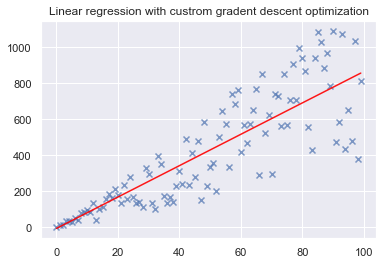

In [6]:
plt.scatter(X, y, cmap='Dark2', marker='x', alpha=.7)
plt.plot(X, a*X + b, color='red', alpha=.9)
plt.title('Linear regression with custrom gradent descent optimization')
plt.show()